<a href="https://colab.research.google.com/github/seoboran/house_price/blob/master/200820_house_price_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기 

In [1]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%ls

drive/  sample_data/


In [4]:
%cd drive/'My Drive'/'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [5]:
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [6]:
%ls

 0818_iris_sample.ipynb
 200819_house_price_.ipynb
 200820_cross_val.ipynb
 Chapter_4_2_cross_val.ipynb
'Chapter_4_3_lightgbm (1).ipynb'
 Chapter_4_3_lightgbm.ipynb
'Copy of Chapter_4_4_classification_titanic_example.ipynb'
'final_classification_titanic_example (1).ipynb'
 final_classification_titanic_example.ipynb
 gender_submission.csv
 mf_project/
 sample_submission.csv
 submission.csv
 test.csv
 train.csv
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled.ipynb


In [7]:
import pandas as pd
from pandas.io import gbq

# import sample_submission file
sample_submission = pd.read_csv('sample_submission.csv')

# Connect to Google Cloud API and Upload DataFrame
sample_submission.to_gbq(destination_table='house_price.sample_submission', 
                  project_id='titanic-286903', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=xaKyzKobnmqzF0P1gDg4FRclTTZ36g&prompt=consent&access_type=offline
Enter the authorization code: 4/3QFuBQ3JdicVGDibt0tXclHy6tS-dyq5H7ceMTAwzhlKSpEY4aVvMrc


1it [00:03,  3.96s/it]


In [21]:
import pandas as pd
from pandas.io import gbq
# import train file 
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [22]:
colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"}
train = train.rename(columns=colnames_dict)
test = test.rename(columns=colnames_dict)

In [23]:
train.to_gbq(destination_table='house_price.train', 
                  project_id='titanic-286903', 
                  if_exists='replace')

1it [00:05,  5.96s/it]


In [58]:
train.to_gbq(destination_table='house_price.test', 
                  project_id='titanic-286903', 
                  if_exists='replace')

1it [00:07,  7.85s/it]


# 2. 데이터 확인

In [24]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [25]:
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- 그 다음 확인해야 하는 것은 Numerical 변수와 Categorical 변수를 구분한다.
- 먼저 numerical_features를 구분하자.


In [27]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [29]:
numeric_features = train.select_dtypes(include=[np.number])

In [31]:
print(numeric_features.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'my3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [32]:
print("The total number of numeric features are: ", len(numeric_features.columns))

The total number of numeric features are:  38


- numeric_features을 제외한 나머지 변수를 추출하자


In [38]:
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The total number of numeric features are:  43


# 3. 연도 데이터 탐색 개요

In [39]:
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


## (1) 연도의 변수 처리 방법
- 여기에서 잊지 말아야 하는 것은 새로운 데이터셋을 만들더라도 항상 종속변수(sales price)는 늘 함께 움직여야 한다.
- 각각의 변수는 어떻게 이해해야 할까?
이 때, 필요한 것이 일종의 데이터 정의서가 필요하다.
data_description.txt를 참고하자.
- 각 변수는 다음과 같다.
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
GarageYrBlt: Year garage was built
YrSold: Year Sold (YYYY)
- 여기에서 우선 각 변수별로 연도가 차이가 나는지 확인해보자.

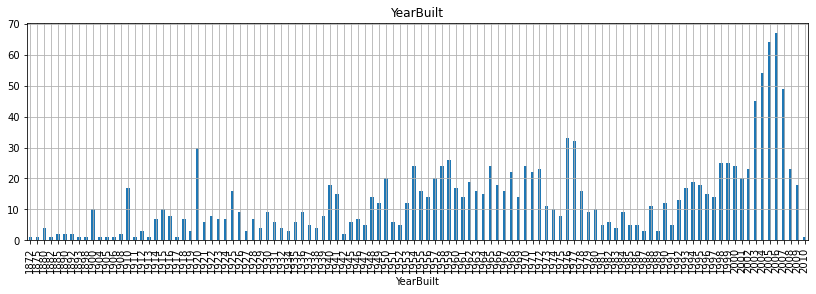

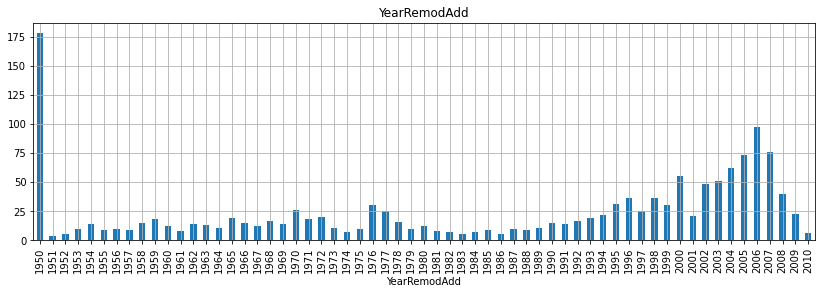

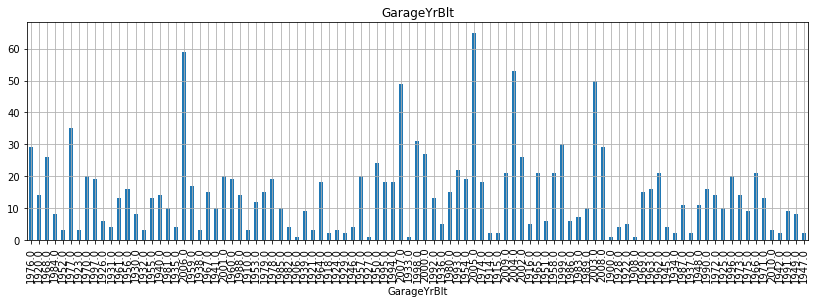

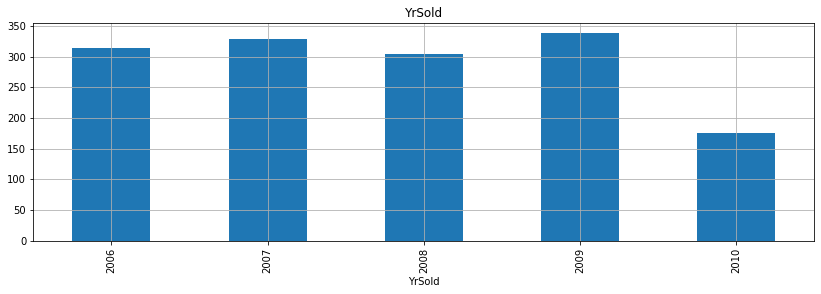

In [40]:
for fea in year_fea:
  data = train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar')
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

## (2) SalePrice와의 관계
- 종속변수:SalePrice
- 조금 의미있는 변수를 만들어야 한다.

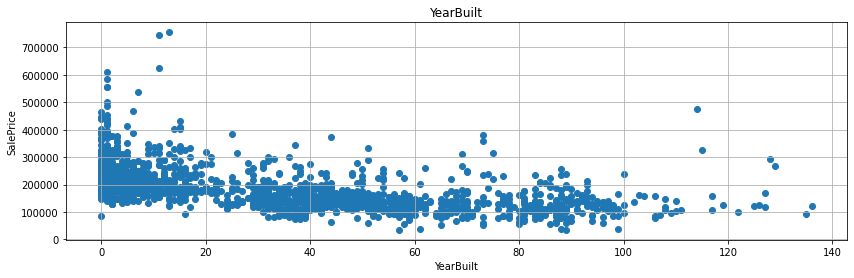

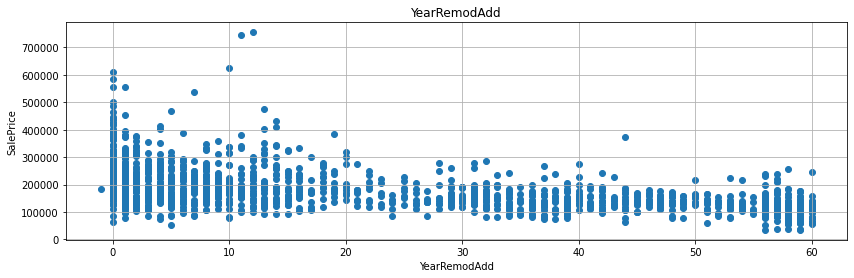

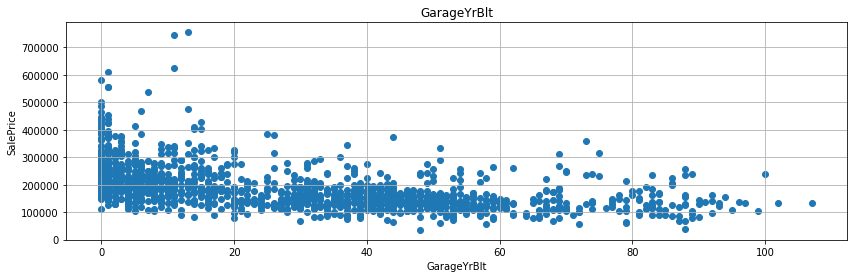

In [41]:
for fea in year_fea:
    if fea!='YrSold': # `YrSold` 변수는 제외 한다.
        data=train.copy() # 이렇게 해주는 것이 좋다. (원본 데이터는 늘 보존할 수 있다)
        data[fea]=data['YrSold']-data[fea] #  여기가 사실 핵심 포인트다. 연수 차이 계산
        plt.scatter(data[fea], data['SalePrice']) # 산점도 그래프를 그린다.
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('SalePrice')
        plt.show()

# 4. 양적 변수 시각화 - 이산형 그래프 
- 양적변수에는 크게 2가지의 변수가 존재한다.
- 이산형(Discrete) 변수: 인원수, 개수 등
연속형(Continuous) 변수: 온도, 키, 몸무게, 소득 등





### (1)가상데이터 생성 
- number_of_room은 방의 개수를 의미한다.
- sales_price는 매매가격을 의미한다.

In [42]:
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


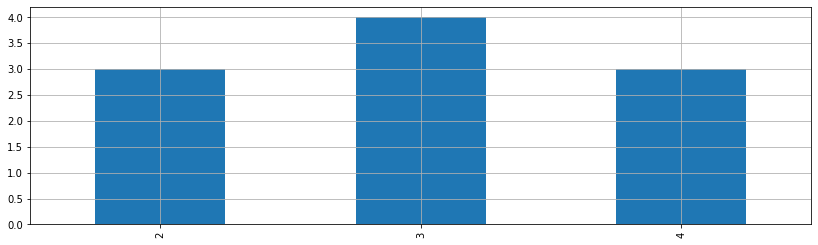

In [43]:
temp['number_of_room'].value_counts(sort=False).plot.bar()
plt.show()

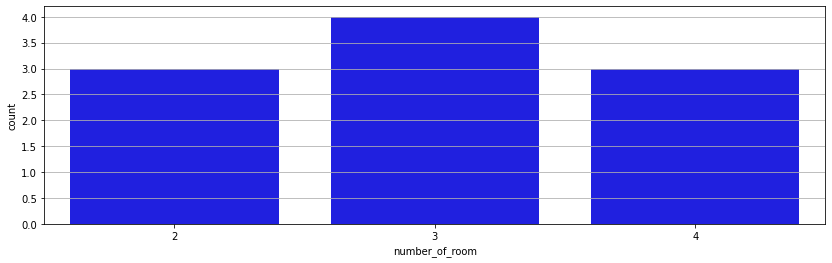

In [46]:
sns.countplot(
    data= temp,
    x= "number_of_room", 
    color='blue'
)
plt.show()

### (2) 이산형 변수와 saleprice



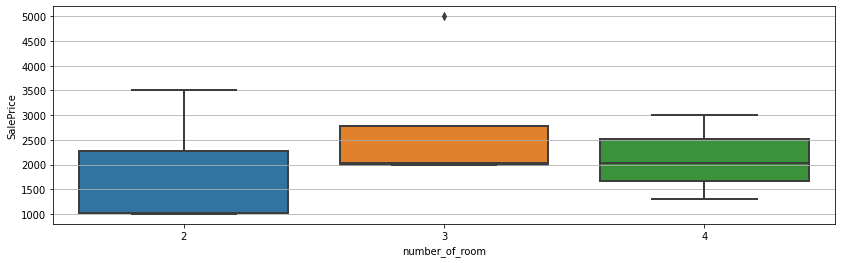

In [47]:
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.show()

### (3) 실무 데이터 적용


In [48]:
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


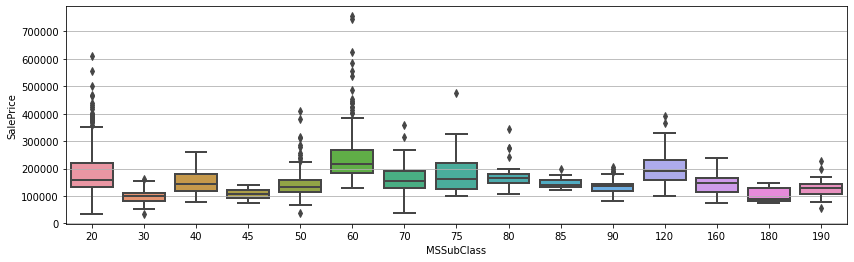

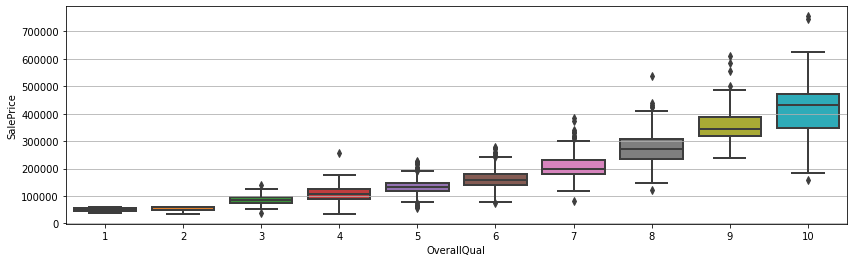

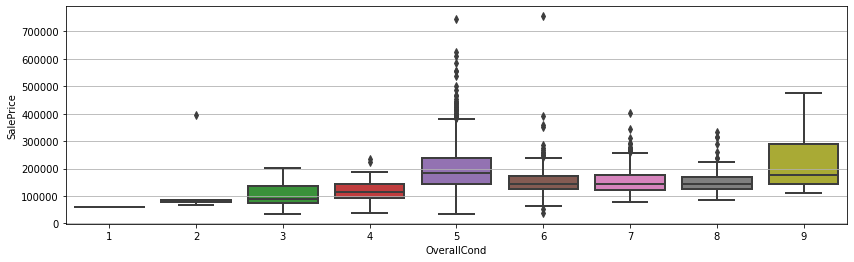

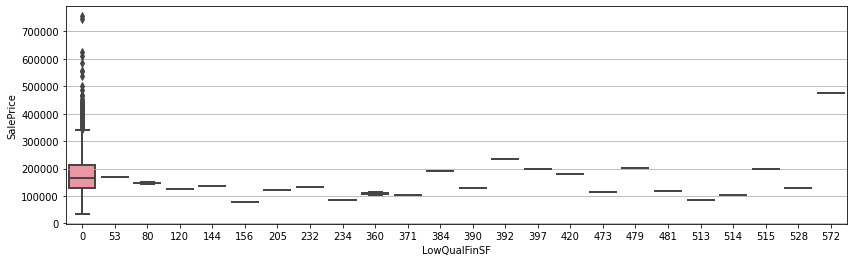

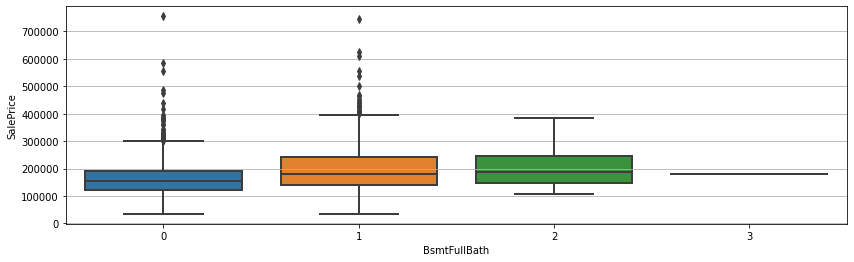

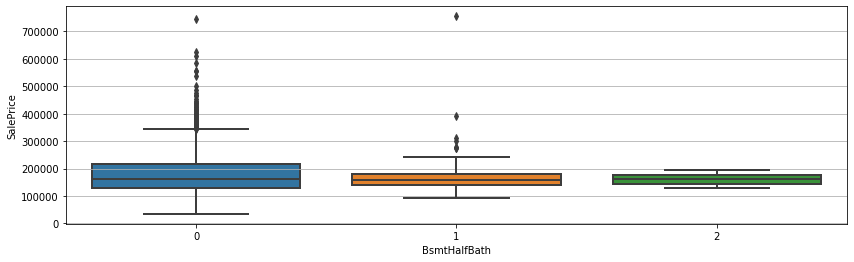

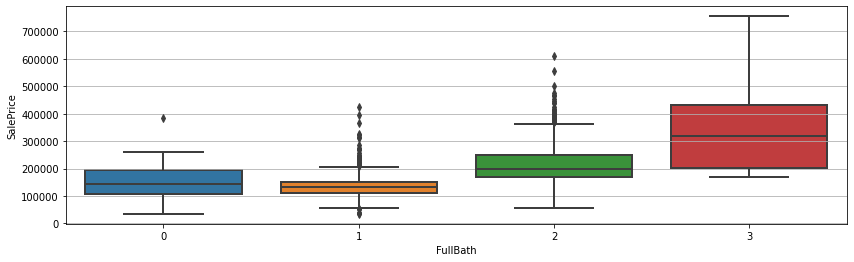

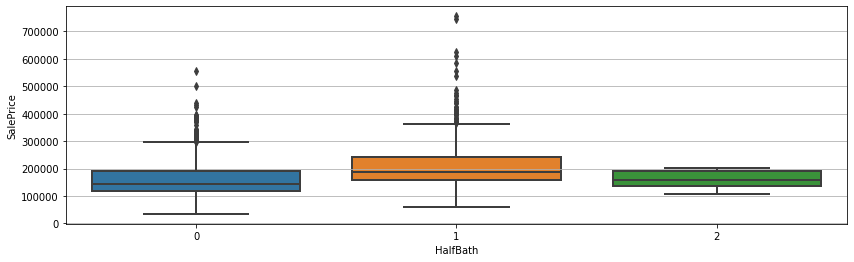

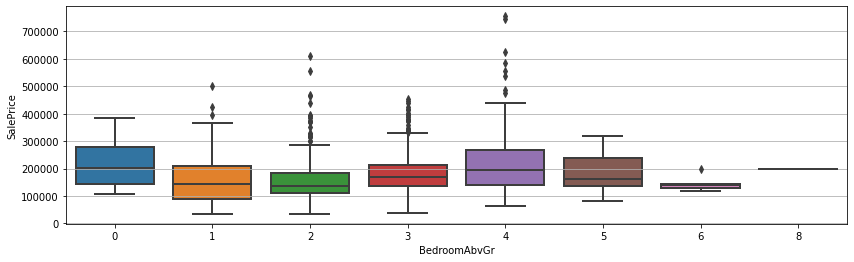

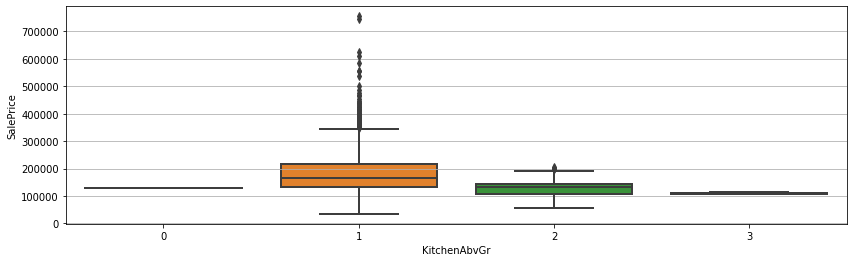

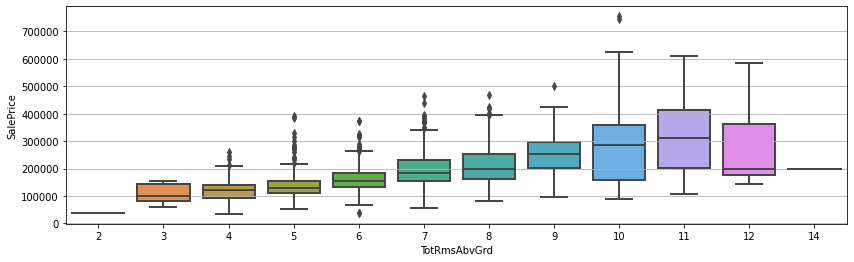

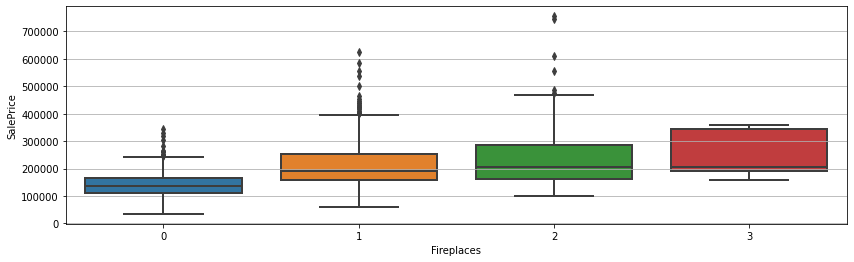

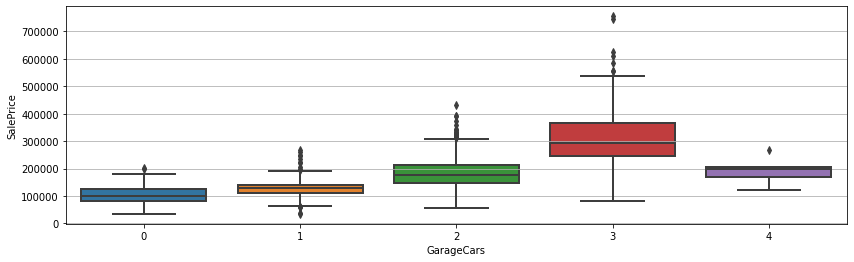

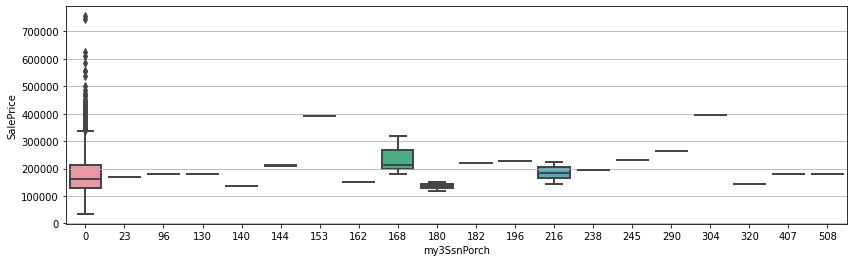

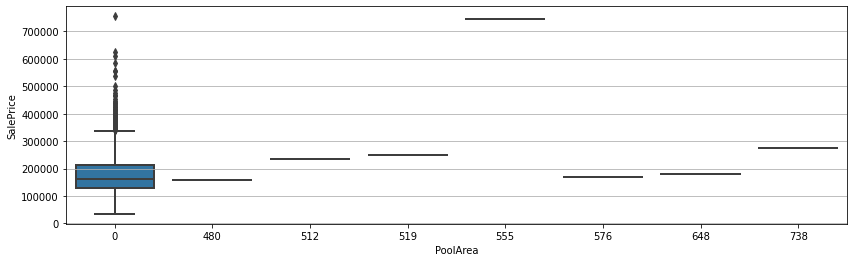

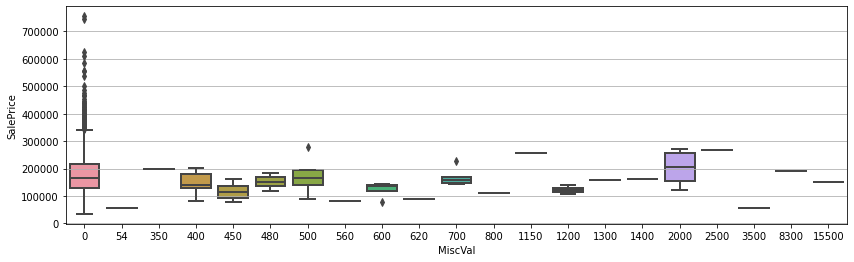

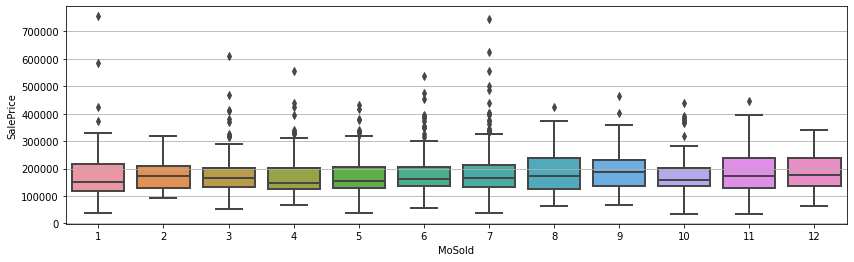

In [49]:
for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

Discrete Variables Count: 14


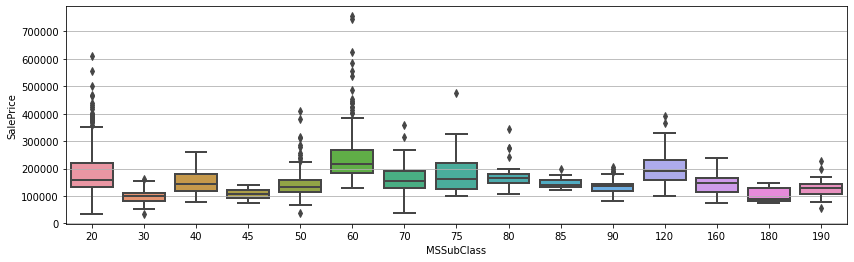

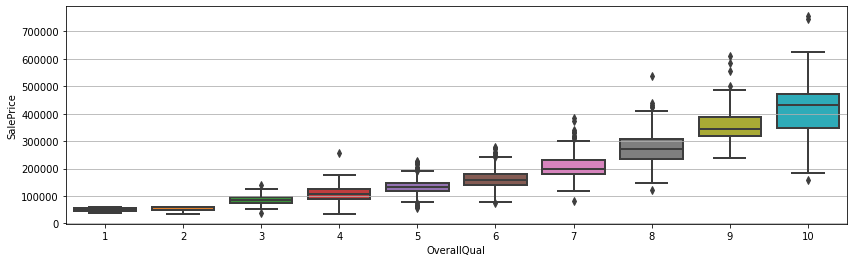

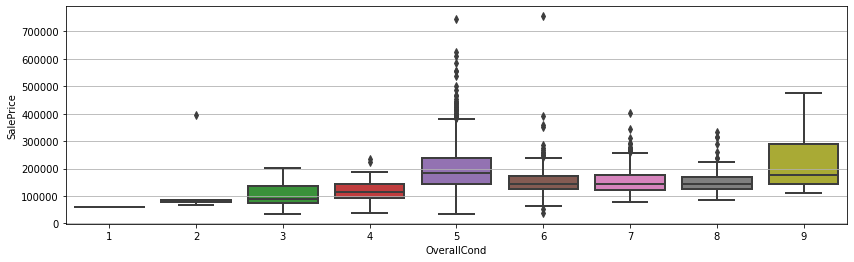

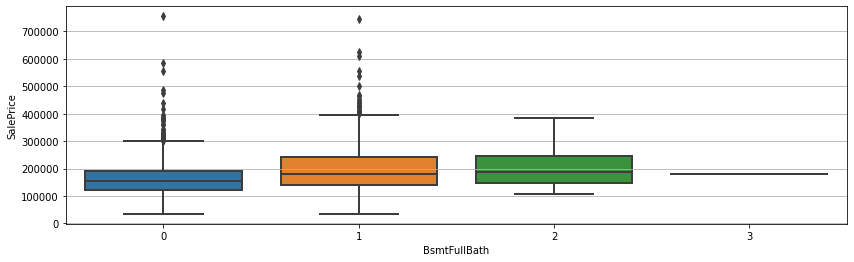

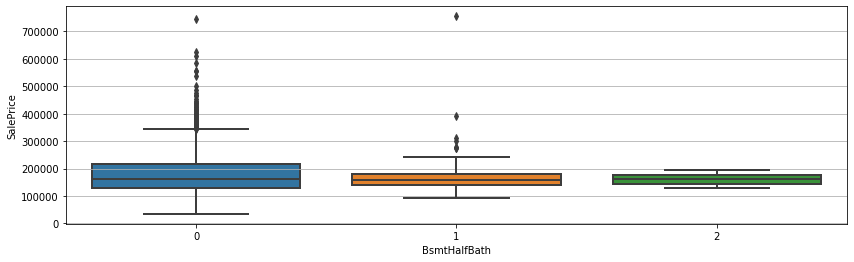

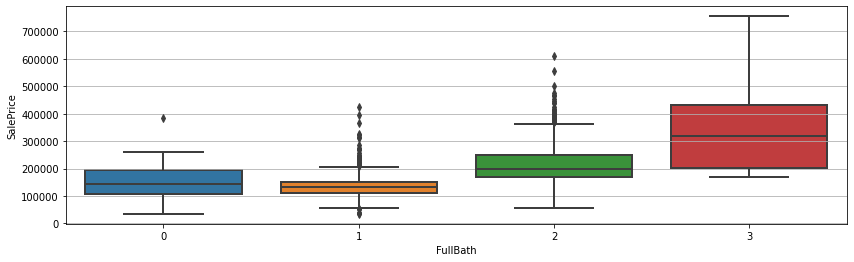

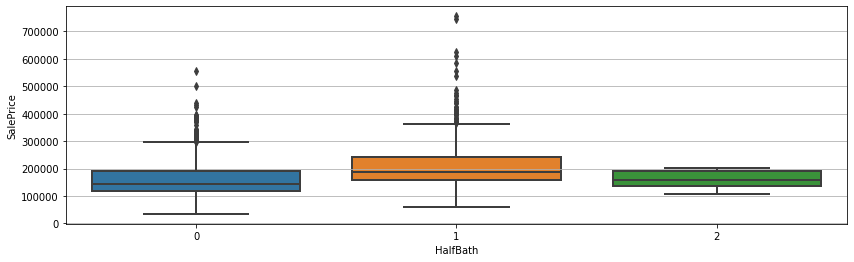

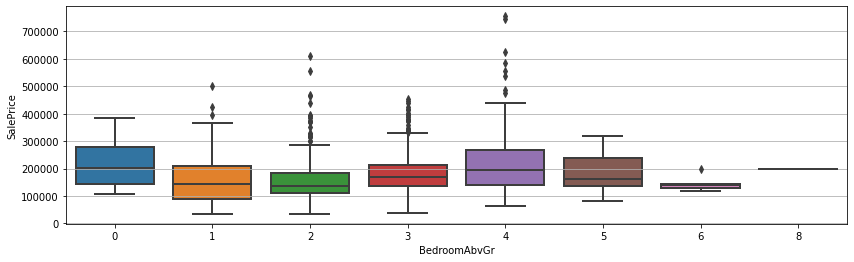

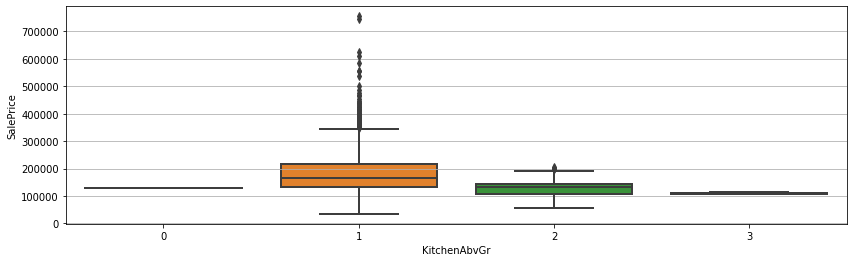

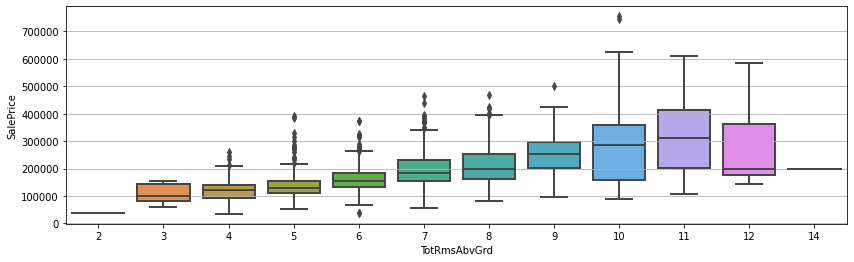

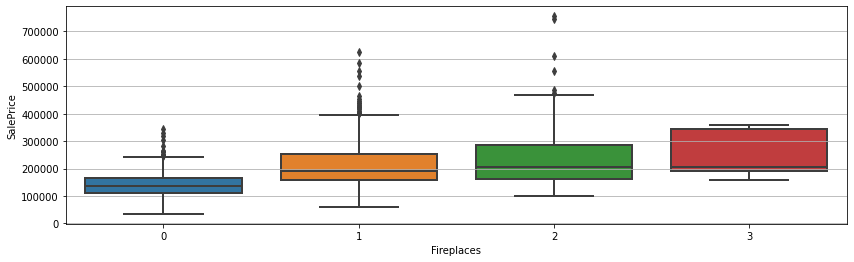

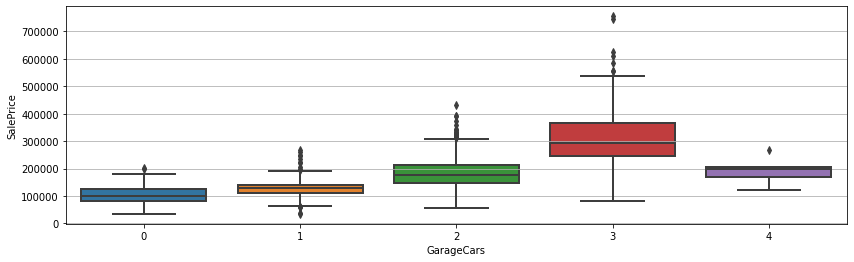

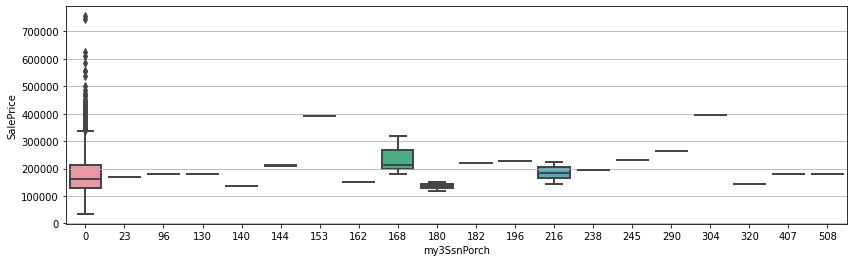

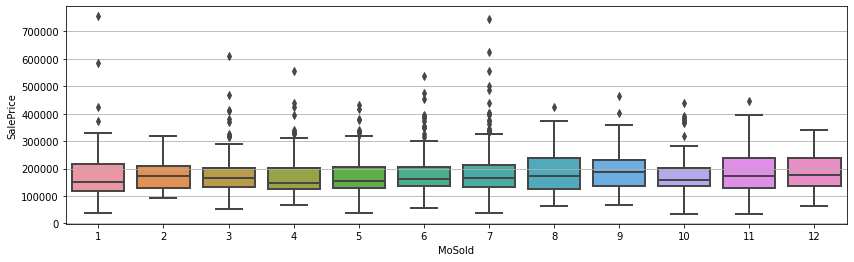

In [52]:
rem_vars = ['PoolArea', 'LowQualFinSF', 'MiscVal', '3SsnPorch']
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + rem_vars + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

for fea in discrete_vars:
    data = train.copy()
    sns.boxplot(x = fea, y='SalePrice', data = data)
    plt.show()

# 5. 양적 변수 시각화- 연속형 그래프 
- 이번에는 수치형 변수중에서 연속형 그래프를 작성하려고 한다.
- 먼저 가상 데이터를 생성해서 간단하게 SalePrice와 관련된 그래프는 어떻게 작성해야 하는지 확인해본다.

## (1) 가상 데이터 생성 
 

In [53]:
LotArea = train['LotArea'].iloc[0:10]
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'LotArea' : LotArea,
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  LotArea  SalePrice
0   1     8450       1000
1   2     9600       1300
2   3    11250       2000
3   4     9550       1030
4   5    14260       2030
5   6    14115       2050
6   7    10084       2000
7   8    10382       5000
8   9     6120       3000
9  10     7420       3500


## (2) 산점도 그래프 

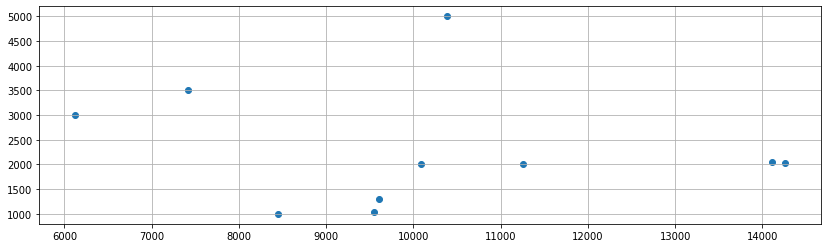

In [54]:
plt.scatter(x=temp['LotArea'], y = temp['SalePrice'])
plt.show()

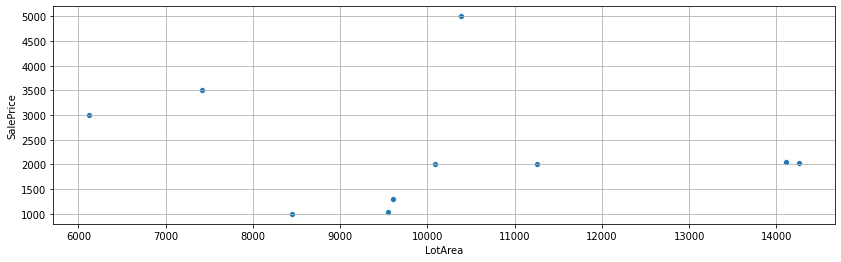

In [55]:
sns.scatterplot(x='LotArea', y='SalePrice', data = temp)
plt.show()

## (3) 실무데이터 적용

In [56]:
continuous_vars = [fea for fea in numeric_features if fea not in discrete_vars + year_fea + ['Id'] + ['SalePrice']]
print(continuous_vars)
print("The total number of continuous_vars are: ", len(continuous_vars))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The total number of continuous_vars are:  18


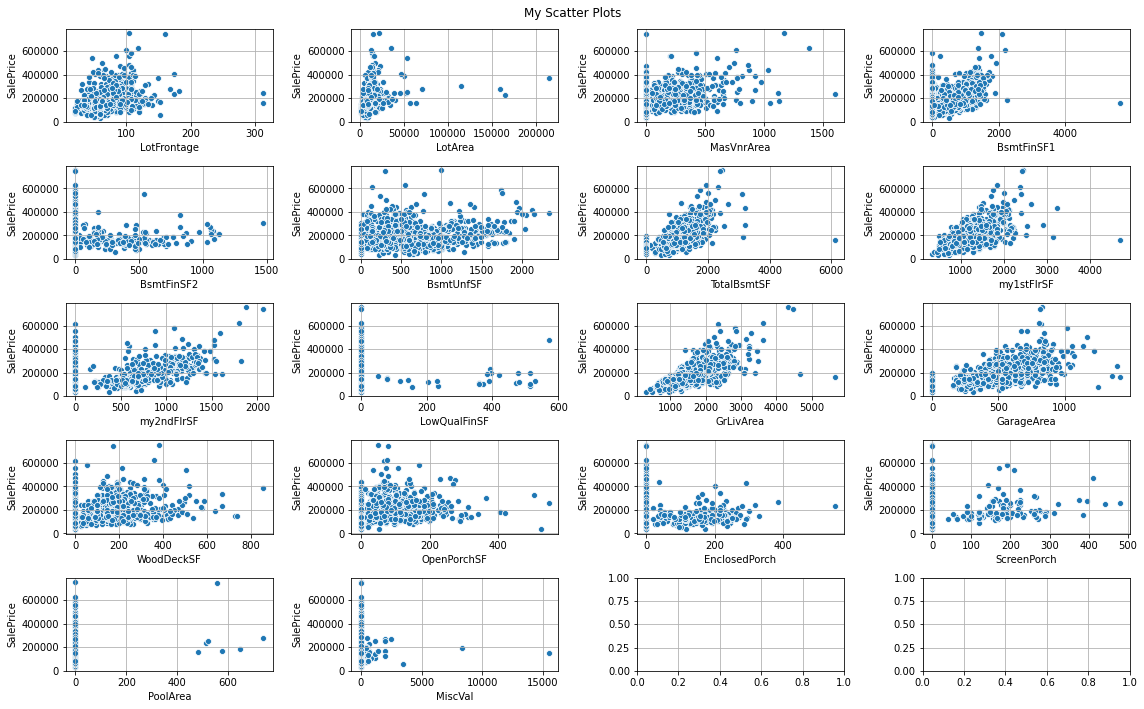

In [57]:
fig, ax = plt.subplots(5, 4, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = train.copy()

for i, col in enumerate(data[continuous_vars].columns[0:]): # 좌표 평면 지정
     if i <= 3:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     else: 
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)